<a href="https://colab.research.google.com/github/johanesraphaeln/bagging-classification/blob/main/ML_ProjectBased_Tipe_1_Kelompok_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KLASIFIKASI - BAGGING

In [ ]:
# Library
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from matplotlib import pyplot

In [ ]:
# Preview dataset
df = pd.read_csv('https://raw.githubusercontent.com/hklfach/Bagging-Classification-Project-Based/main/german_credit.csv', sep=";")
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,03-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,03-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,03-Feb,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Missing Value

In [ ]:
# Cek missing value
df.isnull().any()

status                     False
duration                   False
credit_history             False
purpose                    False
amount                     False
savings                    False
employment_duration        False
installment_rate           False
personal_status_sex        False
other_debtors              False
present_residence          False
property                   False
age                        False
other_installment_plans    False
housing                    False
number_credits             False
job                        False
people_liable              False
telephone                  False
foreign_worker             False
credit_risk                False
dtype: bool

### Ubah Value Kategori Menjadi Value Numerik

In [ ]:
# Cek tipe data kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [ ]:
# Mencari semua kolom dengan value kategori
num_cols = df._get_numeric_data().columns
cat_cols = list(set(df.columns) - set(num_cols))
cat_cols

['purpose',
 'property',
 'present_residence',
 'savings',
 'housing',
 'job',
 'employment_duration',
 'other_debtors',
 'people_liable',
 'credit_risk',
 'telephone',
 'installment_rate',
 'status',
 'credit_history',
 'number_credits',
 'personal_status_sex',
 'foreign_worker',
 'other_installment_plans']

In [ ]:
# Mencari value unik pada kolom dengan value kategori
for col in cat_cols:
  unique_val = df[col].unique().tolist()
  print(f'{col} : {unique_val} , ({len(unique_val)})')

purpose : ['car (used)', 'others', 'retraining', 'furniture/equipment', 'car (new)', 'business', 'domestic appliances', 'radio/television', 'repairs', 'vacation'] , (10)
property : ['car or other', 'unknown / no property', 'building soc. savings agr./life insurance', 'real estate'] , (4)
present_residence : ['>= 7 yrs', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '< 1 yr'] , (4)
savings : ['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM', '... >= 1000 DM', '500 <= ... < 1000 DM'] , (5)
housing : ['for free', 'rent', 'own'] , (3)
job : ['skilled employee/official', 'unskilled - resident', 'unemployed/unskilled - non-resident', 'manager/self-empl./highly qualif. employee'] , (4)
employment_duration : ['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', 'unemployed', '>= 7 yrs'] , (5)
other_debtors : ['none', 'guarantor', 'co-applicant'] , (3)
people_liable : ['0 to 2', '3 or more'] , (2)
credit_risk : ['good', 'bad'] , (2)
telephone : ['no', 'yes (under customer name)'] , 

In [ ]:
# Ganti value tiap kolom dari kategori menjadi numerik

# Kolom 'present_residence'
df['present_residence'].replace(['>= 7 yrs', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '< 1 yr'], [i for i in range(4)], inplace=True)

# Kolom 'credit_risk'
df['credit_risk'].replace(['good', 'bad'], [i for i in range(2)], inplace=True)

# Kolom 'people_liable'
df['people_liable'].replace(['0 to 2', '3 or more'], [i for i in range(2)], inplace=True)

# Kolom 'other_debtors'
df['other_debtors'].replace(['none', 'guarantor', 'co-applicant'], [i for i in range(3)], inplace=True)

# Kolom 'savings'
df['savings'].replace(['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM', '... >= 1000 DM', '500 <= ... < 1000 DM'], [i for i in range(5)], inplace=True)

# Kolom 'foreign_worker'
df['foreign_worker'].replace(['no', 'yes'], [i for i in range(2)], inplace=True)

# Kolom 'employment_duration'
df['employment_duration'].replace(['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', 'unemployed', '>= 7 yrs'], [i for i in range(5)], inplace=True)

# Kolom 'property'
df['property'].replace(['car or other', 'unknown / no property', 'building soc. savings agr./life insurance', 'real estate'], [i for i in range(4)], inplace=True)

# Kolom 'telephone'
df['telephone'].replace(['no', 'yes (under customer name)'], [i for i in range(2)], inplace=True)

# Kolom 'housing'
df['housing'].replace(['for free', 'rent', 'own'], [i for i in range(3)], inplace=True)

# Kolom 'job'
df['job'].replace(['skilled employee/official', 'unskilled - resident', 'unemployed/unskilled - non-resident', 'manager/self-empl./highly qualif. employee'], [i for i in range(4)], inplace=True)

# Kolom 'personal_status_sex'
df['personal_status_sex'].replace(['female : non-single or male : single', 'male : married/widowed', 'female : single', 'male : divorced/separated'], [i for i in range(4)], inplace=True)

# Kolom 'status'
df['status'].replace(['no checking account', '... < 0 DM', '... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM'], [i for i in range(4)], inplace=True)

# Kolom 'number_credits'
df['number_credits'].replace(['1', '03-Feb', '05-Apr', '>= 6'], [i for i in range(4)], inplace=True)

# Kolom 'present_residence'
df['present_residence'].replace(['>= 7 yrs', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '< 1 yr'], [i for i in range(4)], inplace=True)

# Kolom 'other_installment_plans'
df['other_installment_plans'].replace(['none', 'bank', 'stores'], [i for i in range(3)], inplace=True)

# Kolom 'credit_history'
df['credit_history'].replace(['all credits at this bank paid back duly', 'no credits taken/all credits paid back duly', 'existing credits paid back duly till now', 'delay in paying off in the past', 'critical account/other credits elsewhere'], [i for i in range(5)], inplace=True)

# Kolom 'installment_rate'
df['installment_rate'].replace(['< 20', '25 <= ... < 35', '20 <= ... < 25', '>= 35'], [i for i in range(4)], inplace=True)

# Kolom 'purpose'
df['purpose'].replace( ['car (used)', 'others', 'retraining', 'furniture/equipment', 'car (new)', 'business', 'domestic appliances', 'radio/television', 'repairs', 'vacation'], [i for i in range(10)], inplace=True)

In [ ]:
# Preview dataset setelah value semua kolom menjadi numerik
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,0,0,1049,0,0,0,0,0,...,0,21,0,0,0,0,0,0,0,0
1,0,9,0,1,2799,0,1,1,1,0,...,1,36,0,0,1,0,1,0,0,0
2,1,12,1,2,841,1,2,1,0,0,...,1,23,0,0,0,1,0,0,0,0
3,0,12,0,1,2122,0,1,2,1,0,...,1,39,0,0,1,1,1,0,1,0
4,0,12,0,1,2171,0,1,0,1,0,...,0,38,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1,3,1987,0,1,1,1,0,...,1,21,0,0,0,1,1,0,0,1
996,0,24,1,1,2303,0,4,0,1,2,...,1,45,0,1,0,0,0,0,0,1
997,2,21,0,1,12680,3,4,0,1,0,...,3,30,0,2,0,3,0,1,0,1
998,1,12,1,3,6468,3,3,1,1,0,...,3,52,0,1,0,3,0,1,0,1


In [ ]:
# Cek tipe data setiap kolom apakah sudah menjadi numerik semua
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

### Feature Transform (Scaling)

In [ ]:
# Transformasi fitur menggunakan standardisasi
df_before_scaling = df.drop(columns=['credit_risk'])
scaler = StandardScaler()
df_after_scaling = pd.DataFrame(scaler.fit_transform(df_before_scaling), columns=df_before_scaling.columns)

In [ ]:
# Data sebelum scaling
df_before_scaling.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,0,18,0,0,1049,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0
1,0,9,0,1,2799,0,1,1,1,0,1,1,36,0,0,1,0,1,0,0
2,1,12,1,2,841,1,2,1,0,0,0,1,23,0,0,0,1,0,0,0
3,0,12,0,1,2122,0,1,2,1,0,1,1,39,0,0,1,1,1,0,1
4,0,12,0,1,2171,0,1,0,1,0,0,0,38,1,1,1,1,0,0,1


In [ ]:
# Data setelah scaling
df_after_scaling.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,-1.344000,-0.240857,-1.031578,-1.153949,-0.787657,-0.717221,-1.304576,-0.879250,-1.150143,-0.301109,-0.957522,-1.398566,-1.281573,-0.446174,-1.751205,-0.704926,-0.642498,-0.428290,-0.823318,-0.196014
1,-1.344000,-0.987573,-1.031578,-0.680437,-0.167384,-0.717221,-0.612493,0.043363,0.153874,-0.301109,0.003845,-0.405266,0.040363,-0.446174,-1.751205,1.027079,-0.642498,2.334869,-0.823318,-0.196014
2,-0.265348,-0.738668,-0.022206,-0.206925,-0.861381,0.022182,0.079590,0.043363,-1.150143,-0.301109,-0.957522,-0.405266,-1.105315,-0.446174,-1.751205,-0.704926,0.291365,-0.428290,-0.823318,-0.196014
3,-1.344000,-0.738668,-1.031578,-0.680437,-0.407341,-0.717221,-0.612493,0.965976,0.153874,-0.301109,0.003845,-0.405266,0.304750,-0.446174,-1.751205,1.027079,0.291365,2.334869,-0.823318,5.101669
4,-1.344000,-0.738668,-1.031578,-0.680437,-0.389974,-0.717221,-0.612493,-0.879250,0.153874,-0.301109,-0.957522,-1.398566,0.216621,1.468737,0.135869,1.027079,0.291365,-0.428290,-0.823318,5.101669


### Split Dataset

In [ ]:
# x: semua kolom kecuali kolom terakhir
x = df_after_scaling

# y: kolom terakhir (credit_risk)
y = df.iloc[:, -1]

# Ratio split 80% train / 20% test, seed: NIM salah satu anggota
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,random_state=1301204243)

In [ ]:
# Menampilkan hasil split data
print(f'Jumlah training data : {len(x_train)}')
print(f'Jumlah testing data  : {len(x_test)}')

Jumlah training data : 800
Jumlah testing data  : 200


### Pemodelan

In [ ]:
# Parameter
seed = [1301204243, 1301202398, 1301201586, 1301200457]
criterion = ['entropy', 'gini']
max_depth = [20, 40, 60, 70, 80, 100, None]
max_features = [2,4,6,8,10,12,14, 'auto']
n_estimators = [10, 30, 50, 80, 100, 150, 180]

In [ ]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion = criterion[0], 
                               max_depth = max_depth[3], 
                               max_features = max_features[1], 
                               random_state = seed[0])

# Bagging classifier
model = BaggingClassifier(base_estimator = dtree, 
                          n_estimators = n_estimators[2],
                          random_state = seed[0])
model.fit(x_train, y_train)

# Hasil
y_predict = model.predict(x_test)
print('------------Predicted Y Test-----------')
print(y_predict)
print('-----------------Y Test----------------')
print(y_test.values)

------------Predicted Y Test-----------
[0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
-----------------Y Test----------------
[0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0]


### Evaluasi

In [ ]:
# Count value dari kelas 0(Good) dan 1(Bad)
y_test.value_counts()

0    146
1     54
Name: credit_risk, dtype: int64

In [ ]:
# Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, y_predict),
            columns=["Predicted Good", "Predicted Bad"],
            index=["Good", "Bad"])

,Predicted Good,Predicted Bad
Good,138,8
Bad,35,19


In [ ]:
# Akurasi model
accuracy_score(y_test, y_predict)

0.785

Akurasi = (TP + TN) / (TP + TN + FP + FN) = (138 + 19) / (138 + 19 + 35 + 8) = 0.785

Ideal: 0.764
> fold=2, accuracy=0.750 (0.742,0.758)
> fold=3, accuracy=0.763 (0.743,0.775)
> fold=4, accuracy=0.757 (0.744,0.768)
> fold=5, accuracy=0.761 (0.720,0.790)
> fold=6, accuracy=0.758 (0.731,0.802)
> fold=7, accuracy=0.767 (0.739,0.790)
> fold=8, accuracy=0.749 (0.728,0.784)
> fold=9, accuracy=0.760 (0.712,0.820)
> fold=10, accuracy=0.756 (0.670,0.820)
> fold=11, accuracy=0.756 (0.692,0.813)
> fold=12, accuracy=0.749 (0.711,0.819)
> fold=13, accuracy=0.763 (0.675,0.818)
> fold=14, accuracy=0.759 (0.694,0.859)
> fold=15, accuracy=0.764 (0.701,0.836)
> fold=16, accuracy=0.756 (0.677,0.857)
> fold=17, accuracy=0.758 (0.627,0.831)
> fold=18, accuracy=0.756 (0.679,0.857)
> fold=19, accuracy=0.758 (0.660,0.830)
> fold=20, accuracy=0.761 (0.680,0.860)
> fold=21, accuracy=0.769 (0.617,0.854)
> fold=22, accuracy=0.764 (0.609,0.867)
> fold=23, accuracy=0.754 (0.674,0.860)
> fold=24, accuracy=0.761 (0.667,0.833)
> fold=25, accuracy=0.761 (0.600,0.875)
> fold=26, accuracy=0.757 (0.667,0.

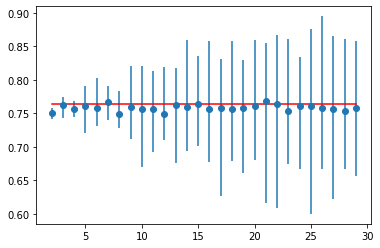

In [ ]:
# Mencari n_splits//error bar ideal

def evaluate_model(cv):
  scores = cross_val_score(model, x, y, scoring='accuracy',cv=cv,n_jobs=-1)
  return np.mean(scores), scores.min(), scores.max()

ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)

folds = range(2, 30)

means, mins, maxs = list(), list(), list()

for k in folds:
  cv = model_selection.KFold(n_splits=k, shuffle=True, random_state=1)
  k_mean, k_min, k_max = evaluate_model(cv)
  print('> fold=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
  means.append(k_mean)
  mins.append(k_mean - k_min)
  maxs.append(k_max - k_mean)

pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
pyplot.show()
  

In [ ]:
# Cek model akurasi dengan kfold
kfold = model_selection.KFold(n_splits=15, random_state=seed[1], shuffle=True)
scores = cross_val_score(model, x, y, scoring='accuracy', cv=kfold, n_jobs=-1)
print('Accuracy: %.3f (Standard Deviation: %.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.755 (Standard Deviation: 0.041)


### Eksperimen

In [ ]:
# Mencari parameter optimal atau terbaik untuk model

# Parameter
seed = [1301204243, 1301202398, 1301201586, 1301200457]
criterion = ['entropy', 'gini']
max_depth = [20, 40, 60, 70, 80, 100, None]
max_features = [2,4,6,8,10,12,14, 'auto']
n_estimators = [10, 30, 50, 80, 100, 150, 180]

# Mencari optimal parameter pada decision tree
d_parameters = {'criterion':criterion, 'max_depth':max_depth, 'max_features':max_features, 'random_state':seed}
d_grid = model_selection.GridSearchCV(DecisionTreeClassifier(), param_grid=d_parameters, verbose=False, cv=kfold, n_jobs=-1)
d_grid.fit(x, y)

print('--------Best Decision Tree Model--------')
print(d_grid.best_score_)
print(d_grid.best_params_)
print(d_grid.best_estimator_)

# Mencari optimal parameter pada bagging classifier
cv = model_selection.StratifiedShuffleSplit(n_splits=15, test_size=.20, random_state=1)
parameters = {'n_estimators':n_estimators}
grid = model_selection.GridSearchCV(BaggingClassifier(base_estimator=d_grid.best_estimator_, bootstrap_features=False), param_grid=parameters, cv=cv,n_jobs=-1)
grid.fit(x,y)

print('--------Best Bagging Classifier Model--------')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

--------Best Decision Tree Model--------
0.7131011608623549
{'criterion': 'entropy', 'max_depth': 40, 'max_features': 6, 'random_state': 1301201586}
DecisionTreeClassifier(criterion='entropy', max_depth=40, max_features=6,
                       random_state=1301201586)
--------Best Bagging Classifier Model--------
0.7700000000000001
{'n_estimators': 150}
BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=40,
                                                        max_features=6,
                                                        random_state=1301201586),
                  n_estimators=150)


In [ ]:
# Mecoba model dengan parameter terbaik hasil pencarian gridsearch terhadap semua data dan menggunakan kfold
kfold = model_selection.KFold(n_splits=15, random_state=seed[1], shuffle=True)
scores = cross_val_score(grid.best_estimator_, x, y, scoring='accuracy', cv=kfold, n_jobs=-1)
print('Accuracy: %.3f (Standard Deviation: %.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.767 (Standard Deviation: 0.028)


In [ ]:
# Mencoba model dengan parameter terbaik hasil pencarian gridsearch terhadap data testing yang dipakai saat tahap pemodelan

# Parameter
seed = [1301204243, 1301202398, 1301201586, 1301200457]
criterion = ['entropy', 'gini']
max_depth = [20, 40, 60, 70, 80, 100, None]
max_features = [2,4,6,8,10,12,14, 'auto']
n_estimators = [10, 30, 50, 80, 100, 150, 180]

# Decision Tree
dtree = DecisionTreeClassifier(criterion = criterion[0], 
                               max_depth = max_depth[1], 
                               max_features = max_features[2], 
                               random_state = seed[2])

# Bagging classifier
model = BaggingClassifier(base_estimator = dtree, 
                          n_estimators = n_estimators[1],
                          random_state = seed[2])
model.fit(x_train, y_train)

# Hasil
y_predict = model.predict(x_test)
print('------------Predicted Y Test-----------')
print(y_predict)
print('-----------------Y Test----------------')
print(y_test.values)
# Akurasi model
print('---------------------------------------------------------------------')
print(f'Akurasi Model Terbaik Hasil Dari GridSearchCV Terhadap Data Testing: {accuracy_score(y_test, y_predict)}')

------------Predicted Y Test-----------
[0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
-----------------Y Test----------------
[0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0]
---------------------------------------------------------------------
Akurasi Model Terbaik Hasil Dari Gri